# Модель для предсказания наличия/отсутствия depression
 


In [43]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [44]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("soumitradas1/mental-health-prediction-using-wearable-dataset")

df = pd.read_csv(path+'/mental_health_wearable_data.csv')
df = df.drop(columns=['Mood_Rating'])

In [45]:
df

,Heart_Rate_BPM,Sleep_Duration_Hours,Physical_Activity_Steps,Mental_Health_Condition
0,98,7.425124,13760,1
1,111,9.457572,11455,0
2,88,4.037103,9174,1
3,74,8.864101,12612,1
4,102,9.690217,3923,0
...,...,...,...,...
9995,107,7.517607,11087,1
9996,82,8.195159,4579,0
9997,65,7.151055,11825,0
9998,110,9.008428,14175,1


In [46]:
df.describe()

,Heart_Rate_BPM,Sleep_Duration_Hours,Physical_Activity_Steps,Mental_Health_Condition
count,10000.000000,10000.000000,10000.00000,10000.000000
mean,89.822000,6.978495,8061.81200,0.515700
std,17.309144,1.730834,4067.11812,0.499778
min,60.000000,4.000317,1000.00000,0.000000
25%,75.000000,5.474809,4468.75000,0.000000
50%,90.000000,6.951605,8116.00000,1.000000
75%,105.000000,8.492401,11617.25000,1.000000
max,119.000000,9.998831,14998.00000,1.000000


In [47]:
# physical_activity_level_encoder = preprocessing.LabelEncoder()
# hypertension_encoder = preprocessing.LabelEncoder()
# gender_encoder = preprocessing.LabelEncoder()
# country_encoder = preprocessing.LabelEncoder()


# df['Physical_Activity_Level'] = physical_activity_level_encoder.fit_transform(df['Physical_Activity_Level'])
# df['Hypertension'] = hypertension_encoder.fit_transform(df['Hypertension'])
# df['Gender'] = gender_encoder.fit_transform(df['Gender'])
# df['Country'] = country_encoder.fit_transform(df['Country'])

# df.head()



In [48]:
# # Outlier Removal
# num_col = ['Age', 'BMI', 'Sleep_Duration',
#            'Heart_Rate']

# Q1 = df[num_col].quantile(0.25)
# Q3 = df[num_col].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]


# Prediction time!

In [49]:
from sklearn.model_selection import train_test_split

# Prepare the data

In [50]:
# Prepare the data
X = df.drop(['Mental_Health_Condition'], axis=1)
y = df['Mental_Health_Condition']

# Split the data into train and test sets

In [51]:
X

,Heart_Rate_BPM,Sleep_Duration_Hours,Physical_Activity_Steps
0,98,7.425124,13760
1,111,9.457572,11455
2,88,4.037103,9174
3,74,8.864101,12612
4,102,9.690217,3923
...,...,...,...
9995,107,7.517607,11087
9996,82,8.195159,4579
9997,65,7.151055,11825
9998,110,9.008428,14175


In [52]:
y

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: Mental_Health_Condition, Length: 10000, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a pipeline

In [54]:
# Модель логистической регрессии с масштабированием признаков

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor


logreg_pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

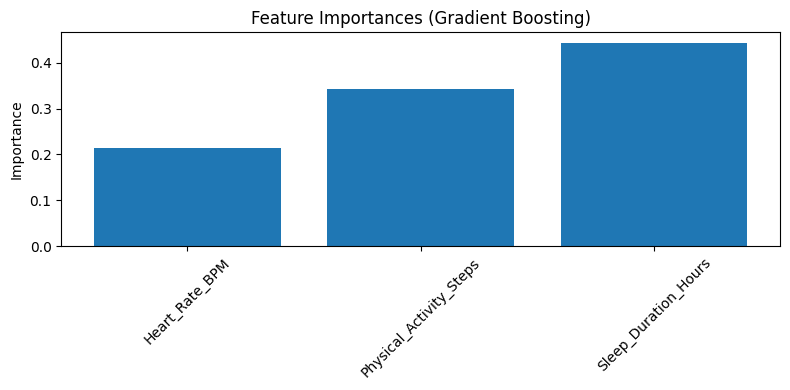

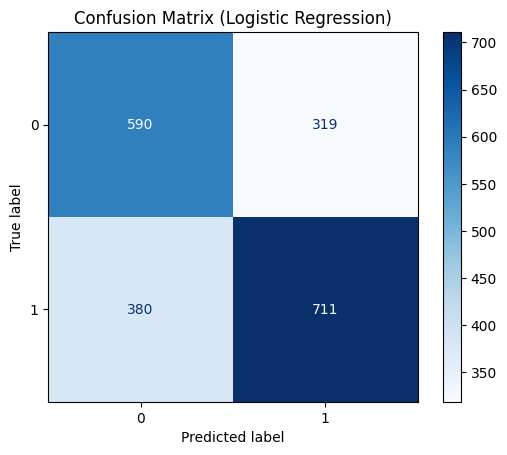

Accuracy : 0.650
Precision: 0.653
Recall   : 0.650
F1-score : 0.651

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       909
           1       0.69      0.65      0.67      1091

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000



In [55]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Визуализация весов параметров логистической регрессии
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Получаем важности признаков для GradientBoostingClassifier
importances = logreg_pipeline.named_steps['clf'].feature_importances_
feature_names = X.columns


sorted_idx = np.argsort(importances)
plt.figure(figsize=(8, 4))
plt.bar(np.array(feature_names)[sorted_idx], importances[sorted_idx])
plt.title('Feature Importances (Gradient Boosting)')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


acc   = accuracy_score(y_test, y_pred_logreg)
prec  = precision_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
rec   = recall_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
f1    = f1_score(y_test, y_pred_logreg, average='weighted', zero_division=0)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}\n")

# 3. Подробный отчёт по каждому классу
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

In [56]:
# Генерация случайного тестового сэмпла по каждому признаку отдельно
heart_rate = np.random.randint(X['Heart_Rate_BPM'].min(), X['Heart_Rate_BPM'].max() + 1)
print(f"Heart Rate (bpm): {heart_rate}")

sleep_duration = np.random.uniform(X['Sleep_Duration_Hours'].min(), X['Sleep_Duration_Hours'].max())
print(f"Sleep Duration (hours): {sleep_duration:.2f}")

physical_activity = np.random.randint(X['Physical_Activity_Steps'].min(), X['Physical_Activity_Steps'].max() + 1)
print(f"Physical Activity Steps: {physical_activity}")

# Собираем все параметры в массив для предсказания
sample = np.array([[heart_rate, sleep_duration, physical_activity]])

# Предсказание
random_pred = logreg_pipeline.named_steps['clf'].predict(sample)
print("Предсказание для случайных данных:", random_pred[0])

probas = logreg_pipeline.named_steps['clf'].predict_proba(sample)
for label, prob in zip(logreg_pipeline.named_steps['clf'].classes_, probas[0]):
    print(f"{label}: {prob:.3f}")


Heart Rate (bpm): 102
Sleep Duration (hours): 9.77
Physical Activity Steps: 1784
Предсказание для случайных данных: 0
0: 0.910
1: 0.090


In [57]:
import pickle

# Сохраняем обученную модель и все энкодеры в один файл
with open('depression.pkl', 'wb') as f:
    pickle.dump({
        'model': logreg_pipeline
    }, f)


In [58]:
import numpy as np
import json
import pickle

def predict_depression(heart_rate, sleep_duration, physical_activity_steps):
    """
    Предсказание наличия депрессии по входным данным:
    - heart_rate: пульс (int)
    - sleep_duration: продолжительность сна (float)
    - physical_activity_steps: количество шагов (int)
    Возвращает вероятности классов в формате JSON.
    """
    # Загружаем модель из файла
    with open('depression.pkl', 'rb') as f:
        data = pickle.load(f)
        model = data['model']

    # Формируем входной массив
    features = [heart_rate, sleep_duration, physical_activity_steps]
    sample = np.array(features).reshape(1, -1)

    probas = model.named_steps['clf'].predict_proba(sample)[0]
    class_labels = model.named_steps['clf'].classes_
    result = {int(label): float(prob) for label, prob in zip(class_labels, probas)}
    return json.dumps(result, ensure_ascii=False)



In [59]:
# Генерация случайных значений для проверки функции предсказания
heart_rate_sample = np.random.randint(df['Heart_Rate_BPM'].min(), df['Heart_Rate_BPM'].max() + 1)
print(f"Heart Rate (bpm): {heart_rate_sample}")

sleep_duration_sample = np.random.uniform(df['Sleep_Duration_Hours'].min(), df['Sleep_Duration_Hours'].max())
print(f"Sleep Duration (hours): {sleep_duration_sample:.2f}")

physical_activity_sample = np.random.randint(df['Physical_Activity_Steps'].min(), df['Physical_Activity_Steps'].max() + 1)
print(f"Physical Activity Steps: {physical_activity_sample}")

# Проверка работы функции предсказания
result_json = predict_depression(
    heart_rate_sample,
    sleep_duration_sample,
    physical_activity_sample
)
print("\nРезультат работы predict_depression:")
print(result_json)


Heart Rate (bpm): 93
Sleep Duration (hours): 6.72
Physical Activity Steps: 11765



Результат работы predict_depression:
{"0": 0.45, "1": 0.55}
